In [ ]:
import pandas as pd
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

churn_data = pd.read_csv('/home/gor/Загрузки/data_for_ds/churn.csv')

In [ ]:
#9.1
exited_data = churn_data['Exited'].value_counts()
exited_fig = plt.figure(figsize=(5,5))
axes = exited_fig.add_axes([0,0,1,1])
axes.pie(
    exited_data,
    labels = ['Loyal', 'Exited'],
    autopct = '%.1f%%',
    shadow = True,
    explode = [0.1, 0]
    )
# Из получившейся диаграммы видно, что число лояльных клиентов составляет 79.6%,
# что почти в 4 раза больше, чем ушедших клиентов.

In [ ]:
#9.2
more_than = churn_data[churn_data['Balance']>2500]
more_than_fig = px.box(more_than, x = 'Balance')
more_than_fig.show()
# Как можно увидеть из графика, медианное значение составляет 119 тысяч долларов
# Основная плотность капиталов клиентов, содержащихся в банке, находится в диапазоне от 41 до 198 тысячб
# Лишь малая часть клиентов банка имеют меньше 41 и более 198 тысяч на счете (аномалии)


In [ ]:
# 9.3
bal_loy_fig = px.box(churn_data, y = 'Balance', x= 'Exited', color = 'Exited')
bal_loy_fig.show()
# Из диаграмы можно увидеть, что среднее значение вкладов ушедших клиентов было выше, чем у лояльных 
# Исходя из графика можно сделать вывод, что банк покинули более состоятельные клиенты

In [ ]:
# 9.4

ages_exited = churn_data[churn_data['Exited'] == 1]['Age'].value_counts()
ages_exited_fig = px.bar(ages_exited, title = 'Exited per age', orientation= 'v')
ages_exited_fig.show()
# Из графика мы видим, что наибольший отток клиентов наблюдается в возрастном диапазоне от 37 до 52 лет
# Также есть 

In [ ]:
# 9.5
rating_fig = px.scatter(
    data_frame= churn_data, 
    x = 'CreditScore',
    y = 'EstimatedSalary',
    color = 'Exited'
    )
# Не знаю насколько грамотно я построил график, но могу сделать один вывод - никакой взаимосвязи между
# между рейтингом и предполагаемой зарплатой нет. Есть только выбросы покинувших банк - их кредитный 
# рейтинг меньше большинства


In [ ]:
# 9.6
mask = churn_data['Exited'] == 1
sex_exited = churn_data[mask]['Gender'].value_counts()
sex_exited_fig = plt.figure(figsize=(5,5))
axes = sex_exited_fig.add_axes([0,0,1,1])
axes.pie(
    sex_exited,
    labels = ['Female','Male'],
    autopct = '%.1f%%',
    shadow = True,
    explode = [0.1, 0]
    )
# Из графика видно, что число покинувших компанию женщин превосходит число мужчин

In [ ]:
# 9.7


barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y = 'Exited',
    hue = 'NumOfProducts',
    estimator = sum
    )
barplot.set_title('Exited per Products')
# Из графика следует, что наибольшее количество отказов поступило от клиентов, воспользовавшимися услугами банка
# 1 раз, самыми лояльными клинетами остались те, кто воспользовался услугами 4 раза
# также большой суммарный отток произошел в группе, которая поьзовалась предлагаемыми услугами 2-3 раза

In [ ]:
# 9.8

active_exited = churn_data[churn_data['Exited'] == 1]['IsActiveMember'].value_counts()
active_fig = plt.pie(active_exited,
                     explode= [0.1, 0],
                     labels=['Passive', 'Active'],
                     autopct='%.1f%%',
                     shadow = True,
                     pctdistance= 0.7,
                     startangle= 70)
# Из графика следует вывод, что 36 процентов покинувших банк являлись пассивными клиентами, что косвенно 
# свидетельствует о их незаинтересованности в данном банке. Для привлечения пассивной части к активному использованию
# услугами банка предлагаю провести акцию - бонусы за получение статуса активного клиента, устроить розыгрыш реальных призов

In [ ]:
# 9.9


churn_data_exited = churn_data[churn_data['Exited'] == 1].groupby(by = 'Geography', as_index= False)['Exited'].sum()
country_fig = px.choropleth(
    data_frame= churn_data_exited,
    locations= 'Geography',
    locationmode= 'country names',
    color = 'Exited',
    range_color=[0, 3e3],
    title='Exited per country',
    width= 800,
    height = 500,
    color_continuous_scale='Reds'
)
#country_fig.show()
# Скорее всего, банк, подвергающийся анализу, находится в одной из этих стран.
# Уход связан с территориальным признаком.

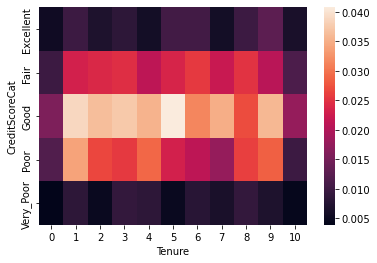

In [109]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['Part_ex'] = churn_data['Exited']/churn_data[churn_data['Exited']==1]['Exited'].count()
pivot_credit_exited = pd.pivot_table(
    churn_data,
    aggfunc='sum',
    values = 'Part_ex',
    index = 'CreditScoreCat',
    columns= 'Tenure'
    )
pivot_fig = sns.heatmap(
    pivot_credit_exited,
    )
# Чаще всего уходят клиенты категории Good, которые пользовались услугами банка от 1 до 5 лет
